In [2]:
import numpy as np 
import pandas as pd 
import yfinance as yf 
import datetime as dt
from statsmodels import regression 
import matplotlib.pyplot as plt 
import math 
import scipy.stats as stats

In [18]:
end_Date = dt.datetime.now()
start_Date = end_Date - dt.timedelta(days= 7000)
stocks = ["SPY", "TLT"]

def get_data(stocks, start, end ):
    stockData = yf.download(stocks, start= start_Date, end= end_Date)
    stockData = stockData[["Close", "Volume"]]
    return stockData
    
df = get_data(stocks, start_Date, end_Date)

df.head()

    

[*********************100%***********************]  2 of 2 completed


Close               Volume         
                   SPY        TLT       SPY      TLT
Date                                                
2004-01-20  114.199997  87.589996  29863000   629600
2004-01-21  115.099998  87.800003  30725000   570500
2004-01-22  114.800003  88.440002  29888500   443600
2004-01-23  114.430000  87.379997  44245300  1021300
2004-01-26  115.870003  86.849998  30460600   639500

In [37]:
# Historical Volatility
log_returns = np.log(df["Close"]/df["Close"].shift(1))
hist_vol = log_returns.rolling(window=40).std() * np.sqrt(252) 

hist_vol = hist_vol.dropna()

options = yf.Ticker(stocks).option_chain(df.index[-1])  # get options data for the last day in the time period
implied_vol = options.calls.impliedVolatility.values  # use call option implied volatility data


AttributeError: 'list' object has no attribute 'upper'

NameError: name 'implied_vol' is not defined

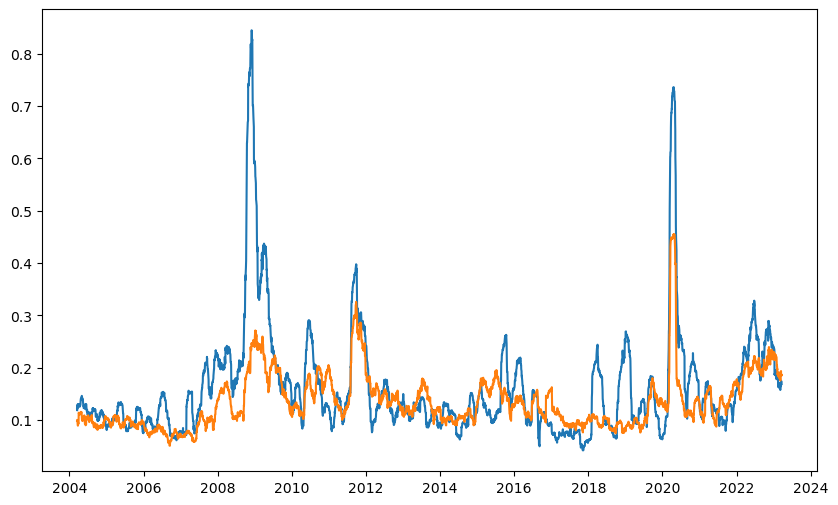

In [38]:
# Step 4: Plot volatility cone
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hist_vol.index, hist_vol, label="Historical Volatility")
ax.plot(df.index[-1], implied_vol, marker="o", markersize=8, label="Implied Volatility")  # plot last day's implied volatility
ax.fill_between(hist_vol.index, hist_vol - 2*hist_vol.std(), hist_vol + 2*hist_vol.std(), alpha=0.2)  # plot 2 standard deviation cone for historical volatility
ax.axhline(implied_vol, linestyle="--", color="black", label="Current Implied Volatility")  # plot line for current implied volatility
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Volatility")
ax.set_title(f"Volatility Cone for {stocks} ({start_Date} to {end_Date})")
plt.show()

TypeError: 'DatetimeIndex' object is not callable

In [28]:
help(yf)

Help on package yfinance:

NAME
    yfinance

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    # yfinance - market data downloader
    # https://github.com/ranaroussi/yfinance
    #
    # Copyright 2017-2019 Ran Aroussi
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    #

PACKAGE CONTENTS
    base
    data
    exceptions
    multi
    scrapers (package)
    shared
    ticker
    tickers
    utils
    version

CLASSES
    builtins.object
        yf